In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv(r"C:\Users\super\Downloads\environmental_data_with_near_real_pm25.csv")

In [2]:
print(df.isnull().sum())

NameError: name 'df' is not defined

In [ ]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Removed {initial_rows - len(df)} duplicate rows.")

In [48]:
for column in df.columns:
    if df[column].dtype == float:  
        df[column].fillna(df[column].mean(), inplace=True)


scaler = MinMaxScaler()
numerical_columns = ['PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 
                     'Air Pollution Index', 'Water Quality Index']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  
0             0.273399  
1             0.590675  
2             0.912466  
3             0.206865  
4             0.621461  


In [2]:
data = pd.read_csv("C:\\Users\\super\\Downloads\\cleaned_environmental_data.csv")
world_data = pd.read_csv("C:\\Users\\super\\Downloads\\world-data-2023_cleaned.csv")

In [3]:
columns_to_add = [
    'Country',  
    'Life expectancy',  
    'GDP', 
    'Out of pocket health expenditure',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Urban_population'  
]

In [4]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  Life expectancy           GDP  \
0             0.273399        64.500000  1.910135e+10   
1             0.590675        78.500000  1.527808e+10   
2             0.912466        76.700000  1.699882e+11   
3             0.206865        72.279679  3.154058e+09   
4             0.621461        60.80

In [5]:
print(merged_data.isnull().sum())
print(merged_data.describe())

Country                                    0
PM2.5 Concentration (µg/m³)                0
CO2 Emissions (metric tons per capita)     0
Air Pollution Index                        0
Water Quality Index                        0
Life expectancy                            0
GDP                                        0
Out of pocket health expenditure           0
Gross tertiary education enrollment (%)    0
Population                                 0
Urban_population                           0
dtype: int64
       PM2.5 Concentration (µg/m³)  CO2 Emissions (metric tons per capita)  \
count                   194.000000                              194.000000   
mean                      0.309327                                0.117241   
std                       0.209440                                0.133184   
min                       0.000000                                0.000000   
25%                       0.139458                                0.029461   
50%                     

Life expectancy                            1.000000
Gross tertiary education enrollment (%)    0.714553
CO2 Emissions (metric tons per capita)     0.448901
GDP                                        0.175355
Air Pollution Index                        0.094701
Urban_population                           0.070007
Population                                 0.008409
Water Quality Index                        0.005960
Out of pocket health expenditure          -0.317561
PM2.5 Concentration (µg/m³)               -0.384366
Name: Life expectancy, dtype: float64


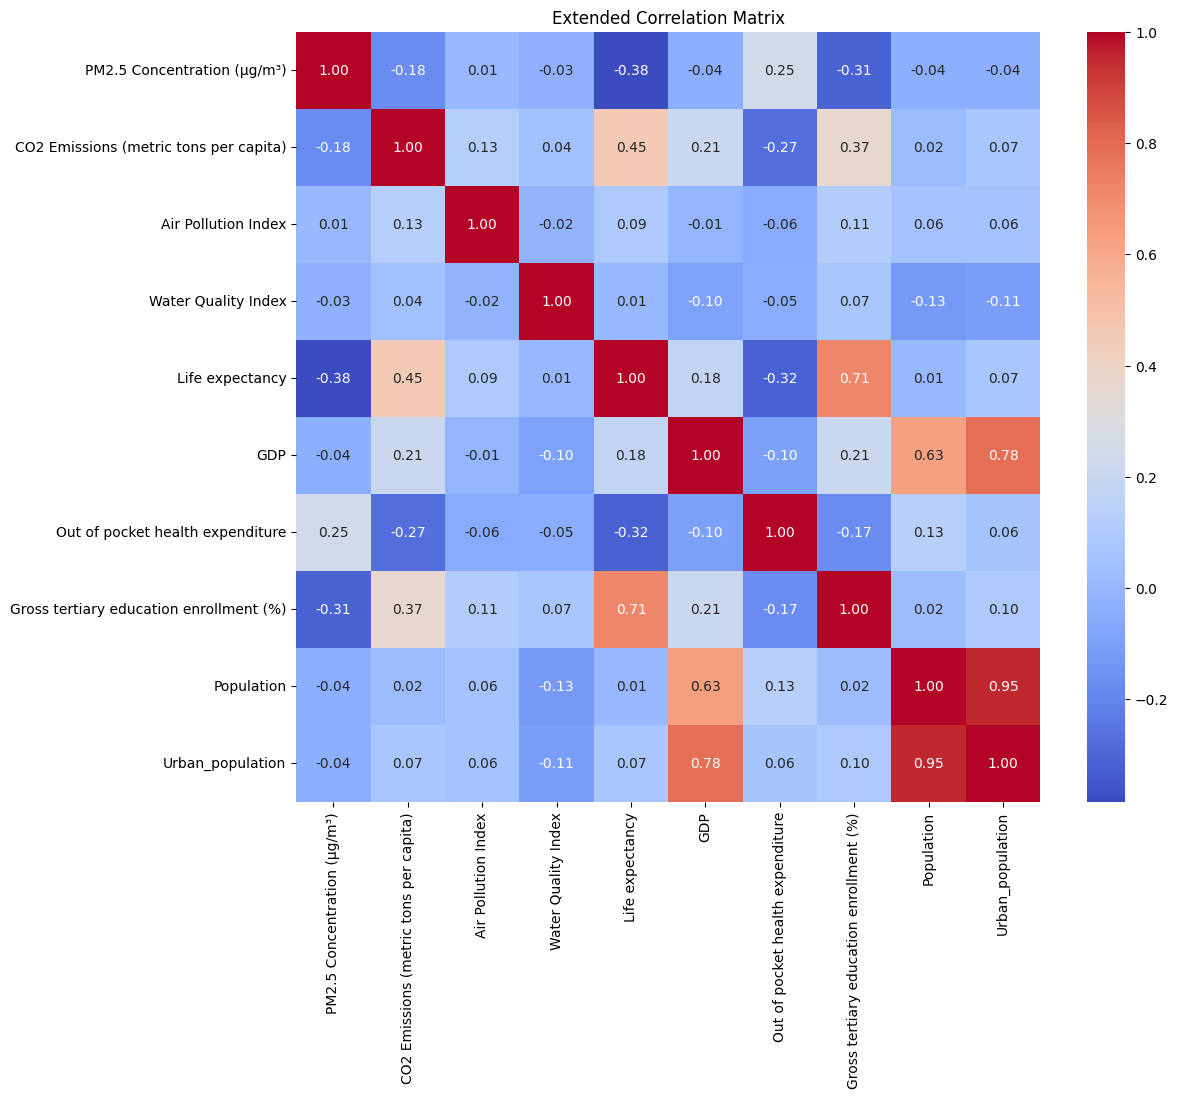

In [6]:
import seaborn as sns
numeric_data = merged_data.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_data.corr()
life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Extended Correlation Matrix')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y = merged_data['Life expectancy']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

en_initial = ElasticNet(random_state=42)
en_initial.fit(X_train_full, y_train_full)

y_pred_en = en_initial.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)
r2_en = r2_score(y_test, y_pred_en)
print(f"ElasticNet RMSE: {rmse_en}, MSE: {mse_en}, R2: {r2_en}")

ElasticNet RMSE: 4.195253455398509, MSE: 17.600151555033133, R2: 0.6032688430581894


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]
}

en = ElasticNet(random_state=42)

grid_search = GridSearchCV(estimator=en, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_full, y_train_full)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

en_optimized = ElasticNet(**best_params, random_state=42)
en_optimized.fit(X_train_full, y_train_full)

y_pred_en_optimized = en_optimized.predict(X_test)
mse_en_optimized = mean_squared_error(y_test, y_pred_en_optimized)
rmse_en_optimized = np.sqrt(mse_en_optimized)
r2_en_optimized = r2_score(y_test, y_pred_en_optimized)
print(f"Optimized ElasticNet RMSE: {rmse_en_optimized}, MSE: {mse_en_optimized}, R2: {r2_en_optimized}")

Best parameters: {'alpha': 0.1, 'l1_ratio': 1}
Optimized ElasticNet RMSE: 4.033036061134303, MSE: 16.265379870409692, R2: 0.6333563973066865


In [9]:
# Initialize and train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_full, y_train_full)

# Predict and evaluate Random Forest
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf}, MSE: {mse_rf}, R2: {r2_rf}")

Random Forest RMSE: 3.4145935901653535, MSE: 11.659449385998318, R2: 0.737180283377231


In [10]:
from sklearn.metrics import mean_absolute_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_rmse_en = []
fold_mae_en = []
fold_r2_en = []

for train_index, valid_index in kf.split(X_train_full):
    X_train, X_valid = X_train_full[train_index], X_train_full[valid_index]
    y_train, y_valid = y_train_full.iloc[train_index], y_train_full.iloc[valid_index]

    en_initial.fit(X_train, y_train)
    y_pred_valid = en_initial.predict(X_valid)

    rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
    mae = mean_absolute_error(y_valid, y_pred_valid)
    r2 = r2_score(y_valid, y_pred_valid)

    fold_rmse_en.append(rmse)
    fold_mae_en.append(mae)
    fold_r2_en.append(r2)

print("ElasticNet RMSE for each fold:", fold_rmse_en)
print("ElasticNet Mean RMSE across all folds:", np.mean(fold_rmse_en))
print("ElasticNet Standard Deviation of RMSE across folds:", np.std(fold_rmse_en))

print("ElasticNet MAE for each fold:", fold_mae_en)
print("ElasticNet Mean MAE across all folds:", np.mean(fold_mae_en))
print("ElasticNet Standard Deviation of MAE across folds:", np.std(fold_mae_en))

print("ElasticNet R2 for each fold:", fold_r2_en)
print("ElasticNet Mean R2 across all folds:", np.mean(fold_r2_en))
print("ElasticNet Standard Deviation of R2 across folds:", np.std(fold_r2_en))

ElasticNet RMSE for each fold: [6.772276920197384, 4.922248118340681, 5.465446289085842, 4.548029775835797, 4.510896106135734]
ElasticNet Mean RMSE across all folds: 5.243779441919088
ElasticNet Standard Deviation of RMSE across folds: 0.8378554417084118
ElasticNet MAE for each fold: [5.240225660070094, 4.321290743632665, 4.291382285551516, 3.536811025293909, 3.792077151570264]
ElasticNet Mean MAE across all folds: 4.236357373223689
ElasticNet Standard Deviation of MAE across folds: 0.5839080345355696
ElasticNet R2 for each fold: [0.39890543557817837, 0.4172395967201893, 0.5396074597430138, 0.5370763569546955, 0.5626617330268615]
ElasticNet Mean R2 across all folds: 0.49109811640458767
ElasticNet Standard Deviation of R2 across folds: 0.06861935229539771


In [11]:
train_meta_features = np.column_stack((en_initial.predict(X_train_full), rf.predict(X_train_full)))
test_meta_features = np.column_stack((en_initial.predict(X_test), rf.predict(X_test)))

meta_model = LinearRegression()
meta_model.fit(train_meta_features, y_train_full)
final_predictions = meta_model.predict(test_meta_features)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_predictions)
print(f"Meta-Model RMSE: {final_rmse}, MSE: {final_mse}, R2: {final_r2}")

Meta-Model RMSE: 3.682777864947313, MSE: 13.562852802545889, R2: 0.6942750028623048


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y = merged_data['Life expectancy']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Initialize and train ElasticNet and RandomForest as base models
en_initial = ElasticNet(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
en_initial.fit(X_train_full, y_train_full)
rf.fit(X_train_full, y_train_full)

train_meta_features = np.column_stack((en_initial.predict(X_train_full), rf.predict(X_train_full)))
test_meta_features = np.column_stack((en_initial.predict(X_test), rf.predict(X_test)))

meta_model = LinearRegression()
meta_model.fit(train_meta_features, y_train_full)
final_predictions = meta_model.predict(test_meta_features)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_predictions)

print(f"Stacking Meta-Model RMSE: {final_rmse:.3f}, MSE: {final_mse:.3f}, R2: {final_r2:.3f}")

Stacking Meta-Model RMSE: 3.683, MSE: 13.566, R2: 0.694


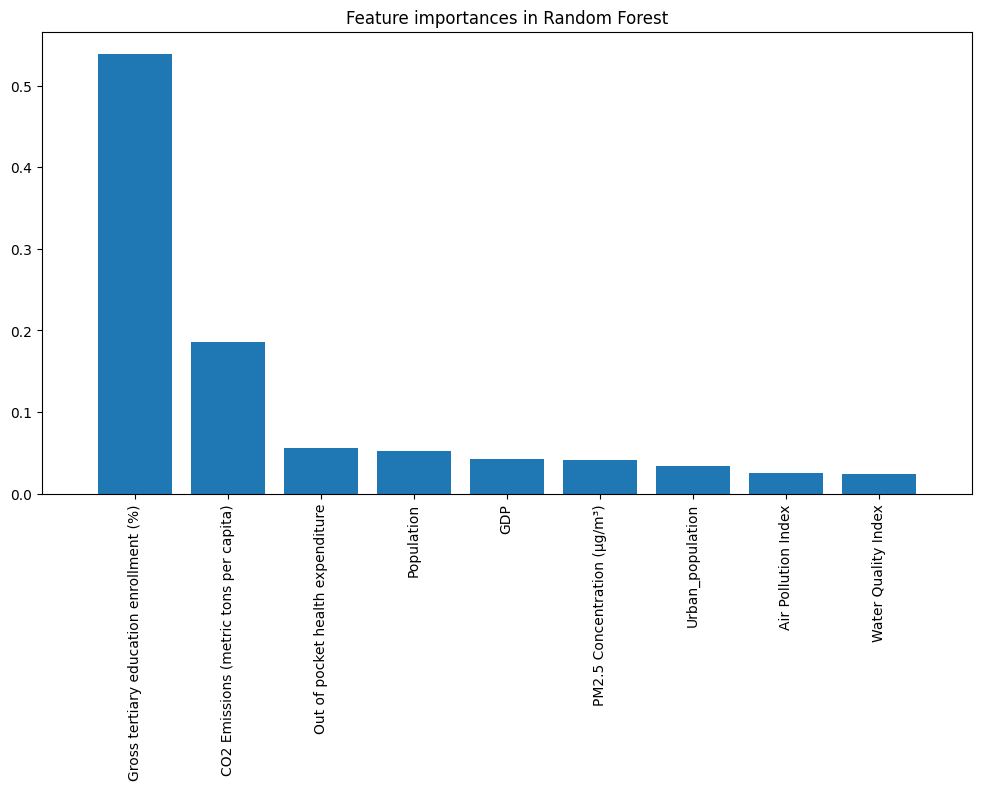

In [13]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature importances in Random Forest")
plt.bar(range(X_train_full.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_full.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_full.shape[1]])
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

en_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

grid_search_en = GridSearchCV(ElasticNet(), en_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_en.fit(X_train_full, y_train_full)
print('Best parameters for ElasticNet:', grid_search_en.best_params_)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train_full, y_train_full)
print('Best parameters for Random Forest:', grid_search_rf.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.9}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_full)
X_test_poly = poly.transform(X_test)

en_initial.fit(X_train_poly, y_train_full)

ElasticNet(random_state=42)

In [16]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_full, y_train_full)

SVR()

In [17]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

extensive_cv = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

y_train_full = y_train_full.reset_index(drop=True) 

for train_idx, valid_idx in extensive_cv.split(X_train_full):
    X_train, X_valid = X_train_full[train_idx], X_train_full[valid_idx]
    y_train, y_valid = y_train_full.iloc[train_idx], y_train_full.iloc[valid_idx]  

    rf_best = RandomForestRegressor(**grid_search_rf.best_params_)
    rf_best.fit(X_train, y_train)
    y_pred = rf_best.predict(X_valid)
    fold_results.append(mean_squared_error(y_valid, y_pred))

print("Extended CV Results:", fold_results)

Extended CV Results: [36.175368399287606, 18.279665599260408, 20.13241403119662, 20.74497440049576, 25.826363355396158, 13.424817840512459, 9.658573014989052, 23.55226865738963, 21.26573101305878, 26.97173256431804]


In [18]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize Repeated K-Fold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

all_rmse = []
all_mae = []
all_r2 = []

use_random_forest = True

for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    if use_random_forest:
        model = RandomForestRegressor() 
    else:
        model = ElasticNet()  

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    all_rmse.append(rmse)
    all_mae.append(mae)
    all_r2.append(r2)

print("Average RMSE:", np.mean(all_rmse))
print("Average MAE:", np.mean(all_mae))
print("Average R²:", np.mean(all_r2))

Average RMSE: 4.3102655810604285
Average MAE: 3.3192039188984395
Average R²: 0.6347890841920003
